In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
import matplotlib as mpl

# Some Matplotlib settings so the font is consistent
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],
                  'size': 20})
mpl.rc('text', usetex=True)

Undamped Pendulum

In [5]:
# Global Variables:
gravity = 1.
length  = 1.

In [6]:
# Undamped Pendulum
def upendulum(ustate,utime):
    # Differential Equation for an Undamped Pendulum.
    # ustate[0] should be angular position, ustate[1] should be angular velocity.
    return[
    ustate[1],
    -gravity / length * np.sin(ustate[0])
    ]

In [7]:
# Generate Measurement Data for the Undamped Pendulum:
udt = .02
ut_train = np.arange(0,100,udt)
ux0_train = [1.25,-0.40]
ux_train = odeint(upendulum,ux0_train,ut_train)
ufeatures_names = ['u_theta(t)','u_dtheta(t)']

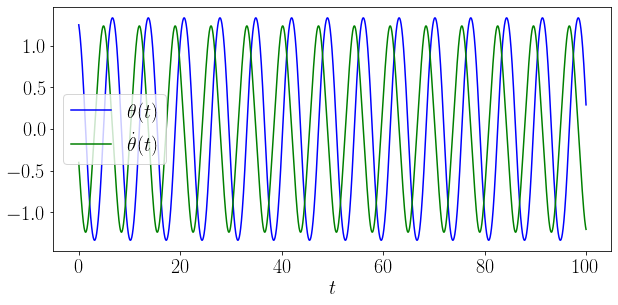

In [58]:
# Visualize the Dynamics - 1
plt.figure(figsize=(10,4.5))
plt.plot(ut_train[:],ux_train[:,0], 'b', label=r'$\theta (t)$')
plt.plot(ut_train[:],ux_train[:,1], 'g', label=r'$\dot{\theta} (t)$')
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.show()

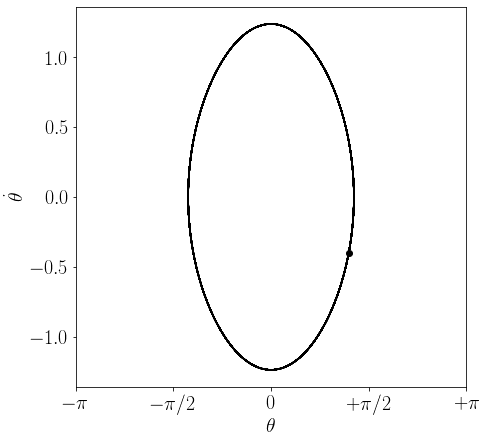

In [9]:
# Visualize the Dynamics - 2
plt.figure(figsize=(7,7))
plt.plot(ux0_train[0], ux0_train[ 1], 'ok')
plt.plot(ux_train[:,0], ux_train[:,1], 'k')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.show()

Damped Pendulum

In [10]:
# Damped Pendulum
def dpendulum(dstate,dtime):
    # Differential Equation for a Damped Pendulum.
    # dstate[0] should be angular position, dstate[1] should be angular velocity.
    beta    = .5   
    return[
    dstate[1],
    -gravity / length * np.sin(dstate[0]) - beta * dstate[1]
    ]

In [11]:
# Generate Measurement Data for the Damped Pendulum:
ddt = .02
dt_train = np.arange(0,100,ddt)
dx0_train = [1.25,-0.40]
dx_train = odeint(dpendulum,dx0_train,dt_train)
dfeatures_names = ['d_theta(t)','d_dtheta(t)']

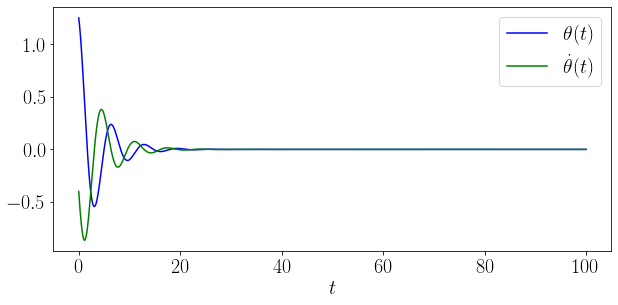

In [12]:
# Visualize the Dynamics - 1

plt.figure(figsize=(10,4.5))
plt.plot(dt_train[:],dx_train[:,0], 'b', label=r'$\theta (t)$')
plt.plot(dt_train[:],dx_train[:,1], 'g', label=r'$\dot{\theta} (t)$')
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.show()

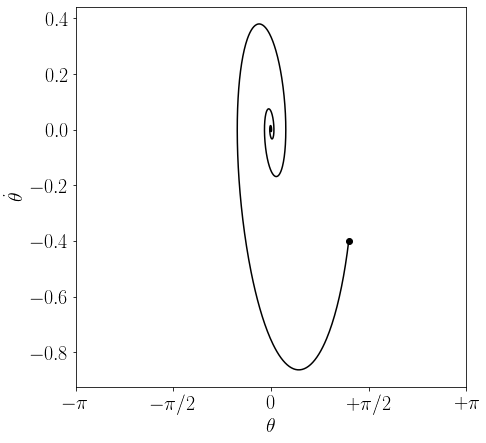

In [13]:
# Visualize the Dynamics - 2

plt.figure(figsize=(7,7))
plt.plot(dx0_train[0], dx0_train[ 1], 'ok')
plt.plot(dx_train[:,0], dx_train[:,1], 'k')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.show()

Phase Space 

In [49]:
theta = np.linspace(-2*np.pi,2*np.pi,100)
theta_dot = np.linspace(-5, 5, 100)

In [50]:
Theta,Theta_Dot = np.meshgrid(theta,theta_dot)

In [63]:
#gamma = 0.0 # Undamped Pendulum
gamma = 0.5 # Damped Pendulum

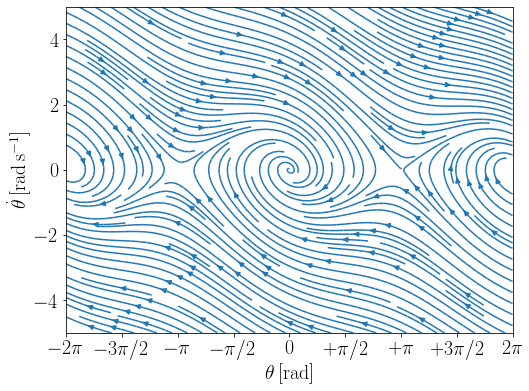

In [64]:
fig, ax = plt.subplots(figsize=(8,6))

xdot = Theta_Dot
ydot = -gravity / length * np.sin(Theta) - gamma * Theta_Dot
plt.streamplot(Theta,Theta_Dot,xdot,ydot,density=2.0)
#plt.grid()
plt.xlabel(r'$\theta\,[\mathrm{rad}]$')
plt.ylabel(r'$\dot{\theta}\,[\mathrm{rad\,s^{-1}}]$')
plt.xticks([-2*np.pi, -3*np.pi/2, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
          [r'$-2\pi$', r'$-3\pi/2$', r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$', r'$+3\pi/2$', r'$2\pi$'])
plt.show()
